In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time as time
import re

In [2]:
pd.options.display.max_rows = 4000
pd.options.display.max_columns = 400

In [3]:
data= pd.read_csv('QueryResults.csv')

In [4]:
data.head()

,Title,Body,Tags,Id,Score,ViewCount,FavoriteCount,AnswerCount
0,Making a particle follow a path in spriteKit,<p>I have created a particle and when I test i...,<ios><iphone><ipad><sprite-kit><skemitternode>,18986098,17,6492,0.0,1
1,"How to find the cause of a malloc ""double free...",<p>I'm programming an application in Objective...,<iphone><objective-c><memory-management><mallo...,971249,82,79057,0.0,13
2,Handling the window closing event with WPF / M...,<p>I'd like to handle the <code>Closing</code>...,<c#><wpf><xaml><mvvm><mvvm-light>,3683450,157,231366,0.0,14
3,SessionTimeout: web.xml vs session.maxInactive...,<p>I'm trying to timeout an <em>HttpSession</e...,<java><session><servlets><weblogic><session-ti...,3118968,65,113655,0.0,2
4,Getting GDB to save a list of breakpoints,"<p>OK, <em><a href=""https://sourceware.org/gdb...",<c++><c><debugging><gdb><breakpoints>,501486,146,51459,0.0,11


In [5]:
data.describe()

,Id,Score,ViewCount,FavoriteCount,AnswerCount
count,5.000000e+04,50000.000000,5.000000e+04,43480.000000,50000.000000
mean,2.339292e+07,32.586460,3.166381e+04,0.000805,3.725420
std,1.829807e+07,169.782703,1.328314e+05,0.153688,3.996872
min,4.000000e+00,6.000000,4.600000e+01,0.000000,1.000000
25%,6.501066e+06,7.000000,3.167000e+03,0.000000,2.000000
50%,1.962270e+07,10.000000,8.594000e+03,0.000000,3.000000
75%,3.748170e+07,19.000000,2.273600e+04,0.000000,4.000000
max,7.555622e+07,9222.000000,9.880691e+06,32.000000,93.000000


In [6]:
data['capital_Title'] = data['Title'].apply(lambda x: [word.lower() for word in re.findall(r'\b[A-Z]+\b', x) if word != 'I'])

In [7]:
len(data['capital_Title'][1])

0

In [9]:
data['pr']=pd.Series(dtype='float64')
for i in range(data.shape[0]):
    if len(data['capital_Title'][i])>0 :
        count=0
        for j in range(len(data['capital_Title'][i])):
            if data['capital_Title'][i][j].lower() in data['Tags'][i] : count+=1
        data['pr'][i]=count/len(data['capital_Title'][i])

C:\Users\wiss\AppData\Local\Temp\ipykernel_8248\2409568189.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['pr'][i]=count/len(data['capital_Title'][i])


In [10]:
data['pr'].mean()

0.7480832457527237

In [11]:
data['pr'].value_counts()

1.000000    10805
0.000000     3171
0.500000      977
0.666667      279
0.333333      153
0.750000       72
0.250000       26
0.600000       17
0.400000       10
0.800000        9
0.833333        6
0.200000        4
0.166667        1
0.181818        1
0.571429        1
0.857143        1
Name: pr, dtype: int64

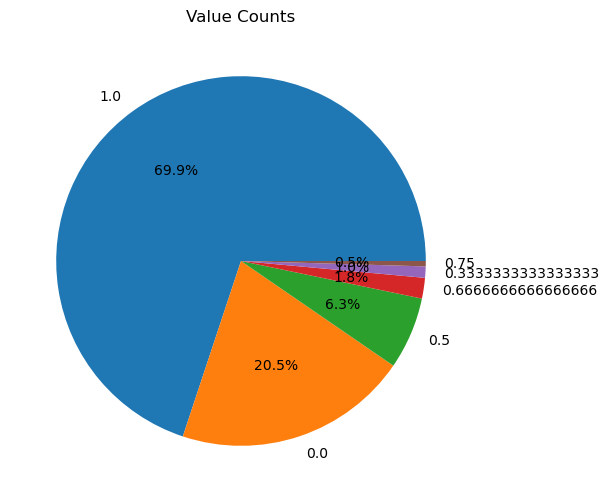

In [12]:
# Get the value counts of the Series
value_counts = data['pr'].value_counts()

# Plot a pie chart of the value counts
plt.figure(figsize=(6, 6))
plt.pie(value_counts[:0.75], labels=value_counts[:0.75].index, autopct='%1.1f%%')
plt.title("Value Counts")
plt.show()

In [13]:
data['FavoriteCount'].value_counts(dropna=False)

0.0     43476
NaN      6520
1.0         3
32.0        1
Name: FavoriteCount, dtype: int64

In [14]:
data.drop(columns=['FavoriteCount'],inplace=True)

## Nettoyage 

In [15]:
import string
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

def nettoyage(data, col):
    #Garder les alphabétiques caractères
    data[col] = data[col].apply(lambda x: re.sub(r'[^a-zA-Z\s]+', '', x))
    
    #conserver les mots qui sont totalement en majuscule
    #data[col+'2'] = data[col].apply(lambda x: [word.lower() for word in re.findall(r'\b[A-Z]+\b', x)])
    
    # Convertir le texte en minuscules
    data[col] = data[col].apply(lambda x: x.lower() if not x.isupper() else x)

    # Supprimer la ponctuation
    data[col] = data[col].str.translate(str.maketrans('', '', string.punctuation))

    # Tokeniser le texte en mots
    data[col] = data[col].apply(word_tokenize)
    
    # Supprimer les stopwords
    data[col] = data[col].apply(lambda words: [word for word in words if word not in stopwords.words('english')])

    # Lemmatiser les mots
    lemmatizer = WordNetLemmatizer()
    data[col] = data[col].apply(lambda words: [lemmatizer.lemmatize(word, pos='n') for word in words])
    
    #convert to str
    data[col] = data[col].apply(lambda x: ' '.join(x))
    data[col] = data[col].astype(str)




In [16]:
%%time
from bs4 import BeautifulSoup
data['Body'] = data['Body'].apply(lambda x: BeautifulSoup(x, 'html.parser').get_text())

Wall time: 1min


In [17]:
%%time
nettoyage(data,'Title')

Wall time: 4min 18s


In [18]:
%%time
nettoyage(data,'Body')

Wall time: 1h 7min 6s


In [19]:
data['capital_Title']=data['capital_Title'].apply(lambda x: ' '.join(x))
data['capital_Title']=data['capital_Title'].astype(str)
data['Text'] = data['Title'] + ' ' + data['Body'] + ' ' + data['capital_Title']

In [20]:
data['NB_Title'] = data['Title'].apply(lambda x: len(x.split()))

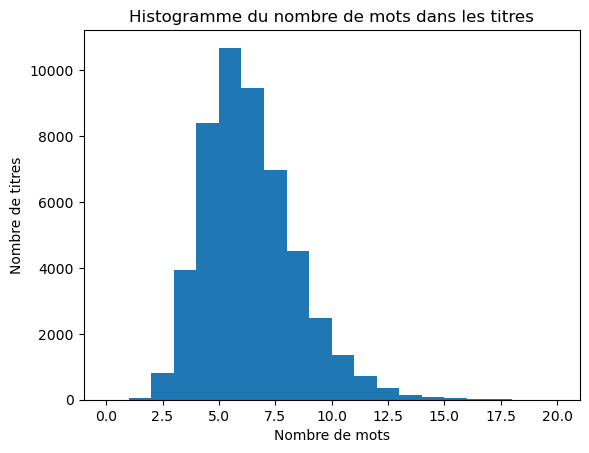

In [21]:
# Tracer l'histogramme de la colonne "NB_Title"
plt.hist(data['NB_Title'],bins=20)

# Afficher le titre et les axes du graphe
plt.title("Histogramme du nombre de mots dans les titres")
plt.xlabel("Nombre de mots")
plt.ylabel("Nombre de titres")

# Afficher le graphe
plt.show()

In [22]:
data['NB_Body'] = data['Body'].apply(lambda x: len(x.split()))

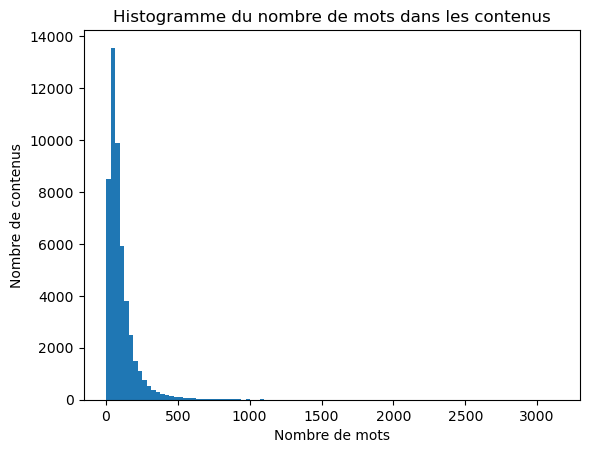

In [23]:
# Tracer l'histogramme de la colonne "NB_Title"
plt.hist(data['NB_Body'],bins=100)

# Afficher le titre et les axes du graphe
plt.title("Histogramme du nombre de mots dans les contenus")
plt.xlabel("Nombre de mots")
plt.ylabel("Nombre de contenus")

# Afficher le graphe
plt.show()

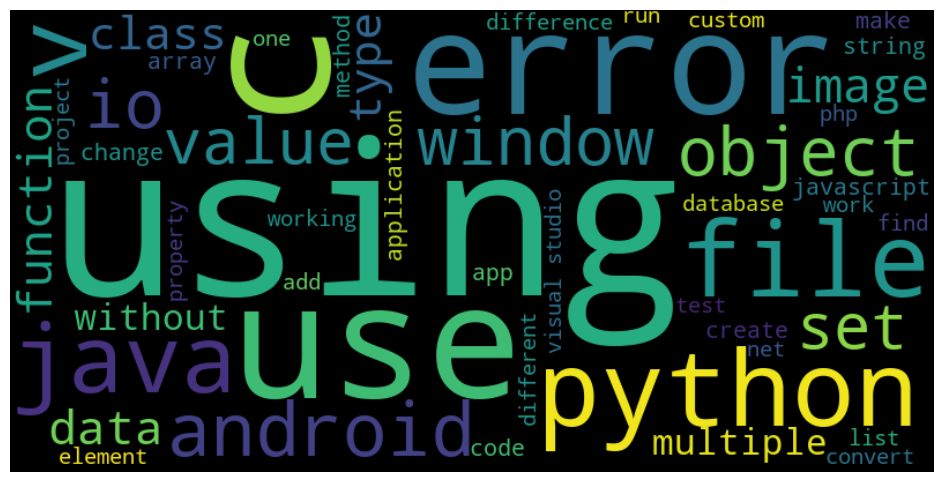

In [24]:
import wordcloud
from wordcloud import WordCloud


# Création d'une chaîne de caractères contenant tous les titres concaténés
t = ' '.join(data['Title'].tolist())

# Création d'un nuage de mots avec les 50 mots les plus fréquents
wordcloud = WordCloud(width=800, height=400, max_words=50).generate(t)

# Affichage du nuage de mots
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [25]:
data.to_csv('C:/Users/wiss/Python/Nettoyage_Projet5', index=False)